# Rendu P1 Guillaume TRICHARD
## Analyse des données du titanic

J'importe les différentes librairies qui vont me servir par la suite pour annalyser le dataFrame train.

In [62]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
%matplotlib inline

### Je récupére des données depuis le fichier CSV "train.csv"

Une fois que le fichier qui contien le DataFrame est localisé, je rentre toutes les données dans Panda afin de traiter celles-ci plus facilement.

In [63]:
#df = le data frame
df = pd.read_csv('train.csv', header=0)
print df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

### Ajout de la colonne Gender et de la colonne AgeFill pour mieux utiliser les données par la suite

Afin de plus facilement analyser les données il est nécessaire de réaliser un travail préparatoir sur celles-ci. En effet il est possible que les données soient perfectibles : 
    * Présence de nan dans certaines colonnes 
    * Majuscules pas toujours présentes
    * Présence de 0
    * Des données de type string qui devrait être en int 
    
C'est pour cela que je réalise un petit tréitement afin de me faciliter la vie 

In [64]:
# Ajouter une colonne :
df['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


### Etude pérmetant de voir les chances de survie des passagers en fonction de l'age de ceux-ci

Il est intéressant de connaitre les différents pourcentages de survie des passagers en fonction de l'âge de ceux-ci
- Suite à cette étude on remarque que les passagers ayants entre 0 et 10 ans ont plus survécu que les autres. 
- En revanche on remarque ques les personnes agées ont peut survécu au drame
- Pour le reste de la population les chances de survies sont relativement similaires 


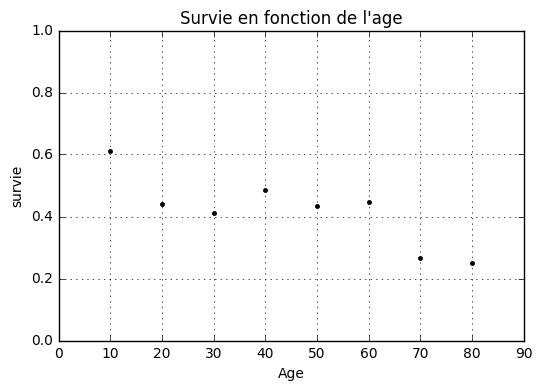

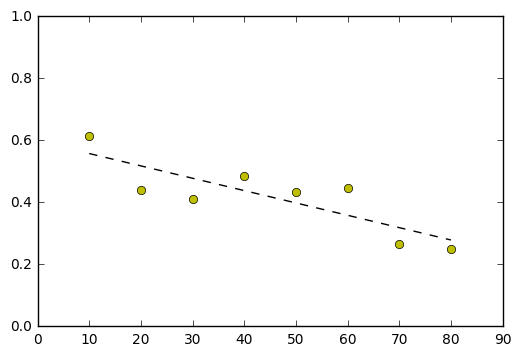

In [65]:
survie = []
age = []
#permet de sortir le pourcentage de survie en fonction de l'age des passagers du bateau
for i in range(1,9):
    survie.append(len(df[ (df['Survived'] == 1) & (df['Age'] <= i*10) & (df['Age'] > (i-1)*10) ]) / len(df[(df['Age'] < i*10) & (df['Age'] > (i-1)*10) ]))
    age.append(i*10)
    

#Premier graphique 
plt.figure()
plt.title('Survie en fonction de l\'age')
plt.xlabel('Age')
plt.ylabel('survie')
plt.plot(age, survie, 'k.')
plt.axis([0, 90, 0, 1])
plt.grid(True)
plt.show()
    

    
    
#graphique de régression linéaire 
fit = np.polyfit(age,survie,1)
fit_fn = np.poly1d(fit) 
plt.plot(age,survie, 'yo', age, fit_fn(age), '--k')
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.show()
    
    
    

### Analyse pour observer les chances de survie des passagers si le numéro 13 est présent dans l'age, le numéro de ticket, le numéro de passager ou le prix du billet

En plus des analyses purement basé sur des caractéristiques tangibles il est aussi possible d'annalyser les données sous un aspect plus supersticieux. 
- Dans l'exemple suivant je vérifie si les passagers du titanic qui possèdent des données contenant un "13" ont plus de chance que survivre au naufrage que les autres. 
- Suite aux résultats de l'annalyse on remarque que les pourcentages sont assez silimaires 


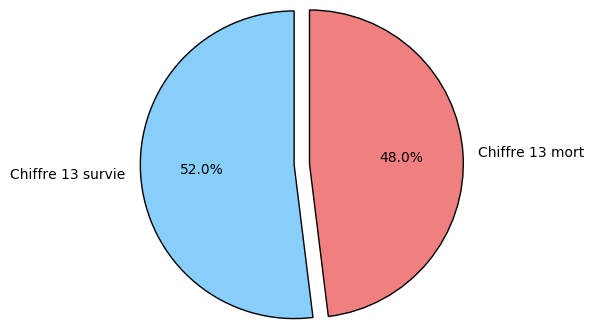

In [66]:
survie = []
survie.append(df[df['PassengerId'].astype(str).str.contains("13")] | df[df['AgeFill'].astype(str).str.contains("13")] | df[df['Ticket'].astype(str).str.contains("13")] | df[df['Fare'].astype(str).str.contains("13")])

#permet de connaitre les chances de survivre si un 13 était présent dans (l'age ou le numéro de ticket ou lid passager ou le prix)
total13 =  len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13"))])
survie13 = len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 1 )])
mort13 = len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 0 )])


labels = 'Chiffre 13 survie', 'Chiffre 13 mort'
sizes = [mort13 / total13*100, 100 - (mort13 / total13 *100)]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()


### Je determine les chances de survie en fonction du prix du billet payé par les passagers 

Il est question dans cette analyse de savoir si il y a une relation entre le prix du billet et les chances de survie des passagers.
- suite a cette analyse on remarque que les chances de survie sont relativement bien dispersé mais il y a cependant quelques données qui sortent du lot : 
       * les passagers qui ont payé leurs billet entre 0 et 10 unité ont peu survécu au naufrage 
       * les passagers qui ont payé leurs billet entre 50 et 60 unité et 70 et 80 unité on mieux survécu au naufrage 

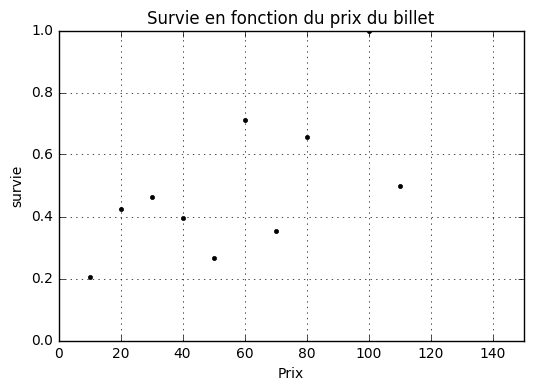

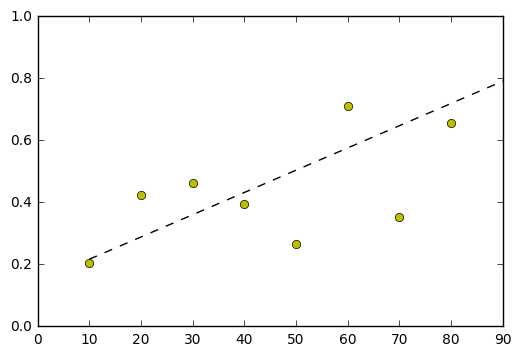

In [67]:
survie2 = []
prix = []
#permet de sortir le pourcentage de survie en fonction de l'age des passagers du bateau
for i in range(1,13):
    survie2.append(len(df[ (df['Survived'] == 1) & (df['Fare'] <= i*10) & (df['Fare'] > (i-1)*10) ]) / len(df[(df['Fare'] < i*10) & (df['Fare'] > (i-1)*10) ]))    
    prix.append(i*10)


plt.figure()
plt.title('Survie en fonction du prix du billet')
plt.xlabel('Prix')
plt.ylabel('survie')
plt.plot(prix, survie2, 'k.')
plt.axis([0, 150, 0, 1])
plt.grid(True)
plt.show()



#graphique de régression linéaire 
fit = np.polyfit(prix,survie2,1)
fit_fn = np.poly1d(fit) 
plt.plot(prix,survie2, 'yo', prix, fit_fn(prix), '--k')
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.show()
    
    


### Permet de déterminer les chances de survies en fonction du port d'embarcation des passagers 
#### C = Cherbourg
#### S = Southampton
#### Q = Queenstown

Dans cette analyse il est question de savoir si le port d'embarcation des passagers infue sur leurs chance de survie.
- suite a ce

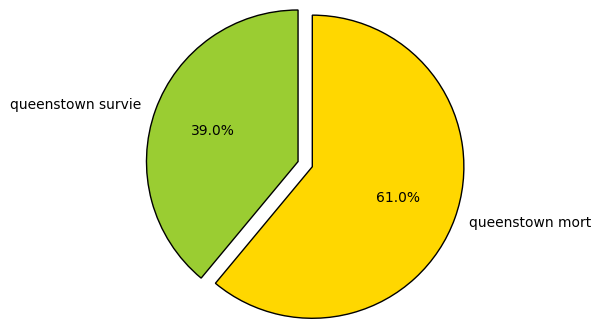

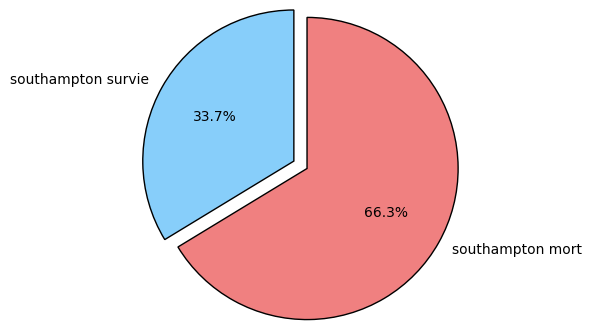

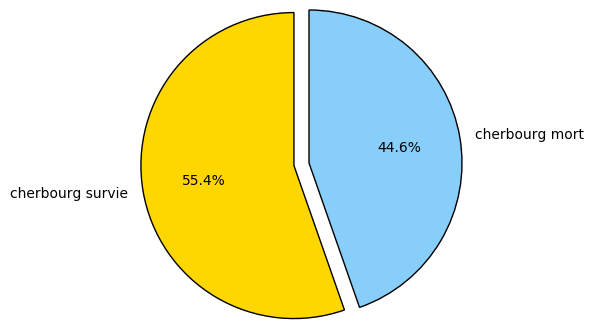

In [70]:
cherbourgSurvive = len(df[ (df['Embarked'] == "C") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
cherbourg = len(df[ df['Embarked'] == "C" ][['Gender','Embarked','Fare','Survived']])
cherbourgRatio = cherbourgSurvive / cherbourg

southamptonSurvive = len(df[ (df['Embarked'] == "S") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
southampton = len(df[ df['Embarked'] == "S" ][['Gender','Embarked','Fare','Survived']])
southamptonRatio = southamptonSurvive / southampton

queenstownSurvive = len(df[ (df['Embarked'] == "Q") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
queenstown = len(df[ df['Embarked'] == "Q" ][['Gender','Embarked','Fare','Survived']])
queenstownRatio = queenstownSurvive / queenstown



labels = 'queenstown survie', 'queenstown mort'
sizes = [queenstownRatio*100, 100-queenstownRatio*100]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


labels = 'southampton survie', 'southampton mort'
sizes = [southamptonRatio*100, 100-southamptonRatio*100]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


labels = 'cherbourg survie', 'cherbourg mort'
sizes = [cherbourgRatio*100, 100-cherbourgRatio*100]
colors = ['gold', 'lightskyblue']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()